In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/carseats.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


1. Add a column called 'Class' that is 1 if Sales >=8 and 0 otherwise. (Be sure to drop the 'Sales' column once you're done!) 2


In [4]:
data['Class']= (data.Sales >= 8)*1

In [5]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [6]:
data=data.drop('Sales',axis=1)

2. One-hot encode the categorical variables (see the pd.get_dummies() function)

In [24]:
data1 = pd.get_dummies(data, ['ShelveLoc', 'Urban', 'Us'])
data1.isna().sum() 

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
Class               0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
Us_No               0
Us_Yes              0
dtype: int64

In [8]:
data1

,CompPrice,Income,Advertising,Population,Price,Age,Education,Class,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,Us_No,Us_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,0,1,0,0,0,1,0,1


3. Split the data set into training and test sets. Use test_size=0.3, random_state=5 in the train_test_split call. 2

In [9]:
Xf=data1.drop('Class',axis=1)
yf=data1['Class']

In [10]:
Xf

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,Us_No,Us_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [11]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=5)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
data1.dtypes

CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Class               int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
Us_No               uint8
Us_Yes              uint8
dtype: object

In [14]:
scaler=StandardScaler()
Xf_train_scaled=scaler.fit_transform(Xf_train)
Xf_test_scaled=scaler.fit_transform(Xf_test)

5. Use sklearn to fit a logistic regression model on the training set and find the accuracy on the test set


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
med_clf = LogisticRegression(random_state=5,penalty='none').fit(Xf_train_scaled, yf_train)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(med_clf.predict(Xf_test_scaled), yf_test)


0.8583333333333333

6. Now use k nearest neighbors to build a classifier. Use the same training and test sets as above. Use cross validation to choose the optimal k. 5

In [19]:
#build classifier 
mc_cvres=[]
# Run through various values for k: use 5-fold cross validation, score with accuracy
for i in range(1,35):
    mclf = KNeighborsClassifier(n_neighbors=i)
    mc_nn = cross_validate(mclf, Xf_train_scaled, yf_train, cv=5, scoring='accuracy')
    #The test score gives an list of the accuracy on each of the five the test-folds
    mc_cvres.append(mc_nn['test_score'].mean())

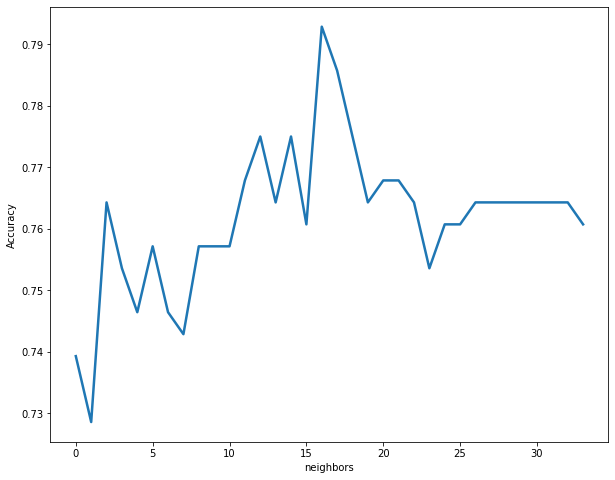

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(len(mc_cvres))),mc_cvres,linewidth=2.5)
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
np.argmax(mc_cvres)

16

In [22]:
mod = KNeighborsClassifier(n_neighbors=16)
nb8=mod.fit(Xf_train,yf_train)

print(np.round(accuracy_score(nb8.predict(Xf_test_scaled),yf_test),3))

0.525


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


7. Comment on your results

In [23]:
print(f'The accuracy of the logit model on train data is :', accuracy_score(med_clf.predict(Xf_train_scaled), yf_train))
print(f'The accuracy of the logit model on test data is :', accuracy_score(med_clf.predict(Xf_test_scaled), yf_test))
print('\n')
print(f'The accuracy of the KNeighborsClassifier model on the train data is :',np.round(accuracy_score(nb8.predict(Xf_train_scaled),yf_train),3))
print(f'The accuracy of the KNeighborsClassifier model on the test data is :',np.round(accuracy_score(nb8.predict(Xf_test_scaled),yf_test),3))

The accuracy of the logit model on train data is : 0.925
The accuracy of the logit model on test data is : 0.8583333333333333


The accuracy of the KNeighborsClassifier model on the train data is : 0.618
The accuracy of the KNeighborsClassifier model on the test data is : 0.525


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Both the logit model and the Kneighbourclassifier perform well on the train data that is the accuracy of both the model decreses on the testing data and thus the model is overfitting.